In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv("gender_classification_v7.csv")

In [4]:
df.head()

,long_hair,forehead_width_cm,forehead_height_cm,nose_wide,nose_long,lips_thin,distance_nose_to_lip_long,gender
0,1,11.8,6.1,1,0,1,1,Male
1,0,14.0,5.4,0,0,1,0,Female
2,0,11.8,6.3,1,1,1,1,Male
3,0,14.4,6.1,0,1,1,1,Male
4,1,13.5,5.9,0,0,0,0,Female


In [5]:
df['gender']=pd.get_dummies(df['gender'],dtype=int,drop_first=True)

In [6]:
df

,long_hair,forehead_width_cm,forehead_height_cm,nose_wide,nose_long,lips_thin,distance_nose_to_lip_long,gender
0,1,11.8,6.1,1,0,1,1,1
1,0,14.0,5.4,0,0,1,0,0
2,0,11.8,6.3,1,1,1,1,1
3,0,14.4,6.1,0,1,1,1,1
4,1,13.5,5.9,0,0,0,0,0
...,...,...,...,...,...,...,...,...
4996,1,13.6,5.1,0,0,0,0,0
4997,1,11.9,5.4,0,0,0,0,0
4998,1,12.9,5.7,0,0,0,0,0
4999,1,13.2,6.2,0,0,0,0,0


In [7]:
x=df.drop('gender',axis=1)
y=df['gender']

In [9]:
from sklearn.preprocessing import StandardScaler
ss=StandardScaler()
x=ss.fit_transform(x)

In [14]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=99)

In [15]:
# logistic

In [16]:
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression()
lr.fit(x_train,y_train)

LogisticRegression()

In [17]:
y_pred1=lr.predict(x_test)
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred1))

              precision    recall  f1-score   support

           0       0.95      0.96      0.96       510
           1       0.96      0.95      0.96       491

    accuracy                           0.96      1001
   macro avg       0.96      0.96      0.96      1001
weighted avg       0.96      0.96      0.96      1001



In [18]:
#knn

In [19]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
error_li=[]
for k in range(1,21):
    knn=KNeighborsClassifier(n_neighbors=k, metric='euclidean')
    knn.fit(x_train,y_train)
    y_pred=knn.predict(x_test)
    error=1-accuracy_score(y_test,y_pred)
    error_li.append(error)

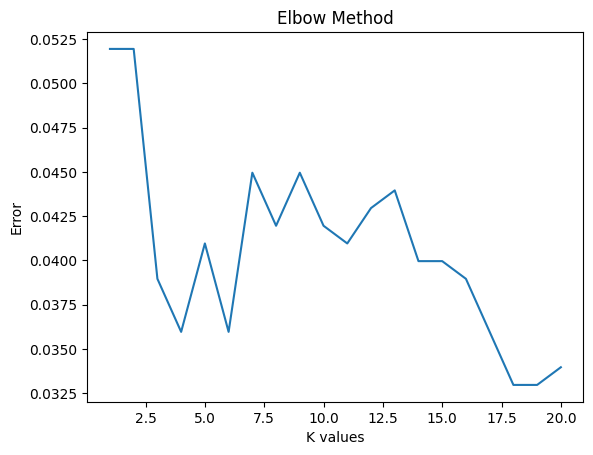

In [20]:
plt.title('Elbow Method')
plt.plot(range(1,21),error_li)
plt.xlabel('K values')
plt.ylabel('Error')
plt.show()

In [47]:
knn=KNeighborsClassifier(n_neighbors=18, metric='euclidean')
knn.fit(x_train,y_train)
y_pred2=knn.predict(x_test)
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred2))

              precision    recall  f1-score   support

           0       0.95      0.98      0.97       510
           1       0.98      0.95      0.97       491

    accuracy                           0.97      1001
   macro avg       0.97      0.97      0.97      1001
weighted avg       0.97      0.97      0.97      1001



In [48]:
# naivy bays

In [23]:
from sklearn.naive_bayes import GaussianNB
gnb=GaussianNB()
gnb.fit(x_train,y_train)
y_pred3=gnb.predict(x_test)

In [24]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred3))

              precision    recall  f1-score   support

           0       0.96      0.97      0.97       510
           1       0.97      0.96      0.97       491

    accuracy                           0.97      1001
   macro avg       0.97      0.97      0.97      1001
weighted avg       0.97      0.97      0.97      1001



In [25]:
# desision tree

In [26]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

In [27]:
dt=DecisionTreeClassifier()

In [28]:
param_dict={'criterion': ['gini','entropy'],
            'max_depth':[5,10,20,None],
            'min_samples_split': [2,5,10,15],
            'min_samples_leaf': [1,5,10,20]}
grid=GridSearchCV(dt, param_grid=param_dict, cv=5)

In [29]:
grid.fit(x_train, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [5, 10, 20, None],
                         'min_samples_leaf': [1, 5, 10, 20],
                         'min_samples_split': [2, 5, 10, 15]})

In [32]:
best_dt=grid.best_estimator_
grid.best_params_
y_pred4= best_dt.predict(x_test)


In [33]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred4))


              precision    recall  f1-score   support

           0       0.95      0.98      0.96       510
           1       0.98      0.94      0.96       491

    accuracy                           0.96      1001
   macro avg       0.96      0.96      0.96      1001
weighted avg       0.96      0.96      0.96      1001



In [34]:
from sklearn.model_selection import ParameterGrid
len(list(ParameterGrid(param_dict)))

128

In [35]:
# forest tree

In [36]:
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier()

In [37]:
param_dict={'n_estimators':[5,10,100,200],
    'criterion': ['gini','entropy'],
            'max_depth':[5,10,20,None],
            'min_samples_split': [2,5,10,15],
            'min_samples_leaf': [1,5,10,20]}
len(list(ParameterGrid(param_dict)))

512

In [38]:
grid_model=GridSearchCV(rf,param_grid=param_dict,cv=5)
grid_model.fit(x_train, y_train)
print(grid.best_params_)

{'criterion': 'gini', 'max_depth': 10, 'min_samples_leaf': 5, 'min_samples_split': 2}


In [39]:

best_rf=grid_model.best_estimator_
y_pred=best_rf.predict(x_test)

In [40]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.95      0.98      0.97       510
           1       0.98      0.95      0.96       491

    accuracy                           0.97      1001
   macro avg       0.97      0.96      0.96      1001
weighted avg       0.97      0.97      0.97      1001



In [41]:
# svm

In [42]:
from sklearn.svm import SVC

In [43]:
model_svc=SVC()


In [44]:
model_svc.fit(x_train,y_train)

SVC()

In [45]:
y_pred=model_svc.predict(x_test)

In [46]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.95      0.97      0.96       510
           1       0.97      0.95      0.96       491

    accuracy                           0.96      1001
   macro avg       0.96      0.96      0.96      1001
weighted avg       0.96      0.96      0.96      1001

